In [71]:
!pip install nltk
!pip install scikit-learn


In [72]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HITESHKAVATI\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HITESHKAVATI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HITESHKAVATI\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [73]:
# Load dataset
df = pd.read_csv("chatbot.csv")  # Replace "your_dataset.csv" with the path to your dataset

# Preprocessing function
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text.lower())
    
    # Remove punctuation
    tokens = [word for word in tokens if word not in string.punctuation]
    
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    # Join tokens back into a string
    preprocessed_text = ' '.join(tokens)
    
    return preprocessed_text

# Apply preprocessing to user_input and chatbot_response columns
df['user_input_processed'] = df['user_input'].apply(preprocess_text)
df['chatbot_response_processed'] = df['chatbot_response'].apply(preprocess_text)

# Print the first few rows of preprocessed data
print(df.head())


                            user_input  \
0    I'm feeling anxious about my job.   
1        I'm worried about the future.   
2     I'm experiencing social anxiety.   
3    I'm feeling down and unmotivated.   
4  I don't enjoy the things I used to.   

                                    chatbot_response  \
0  I'm sorry to hear that. Have you tried talking...   
1  It's natural to feel that way. Can I offer som...   
2  It can be tough, but you're not alone. Would y...   
3  I'm here to help. Have you talked to anyone ab...   
4  It might be a sign of something deeper. I'm he...   

             user_input_processed  \
0          'm feeling anxious job   
1               'm worried future   
2  'm experiencing social anxiety   
3          'm feeling unmotivated   
4            n't enjoy thing used   

                         chatbot_response_processed  
0               'm sorry hear tried talking someone  
1          's natural feel way offer support advice  
2           tough 're alo

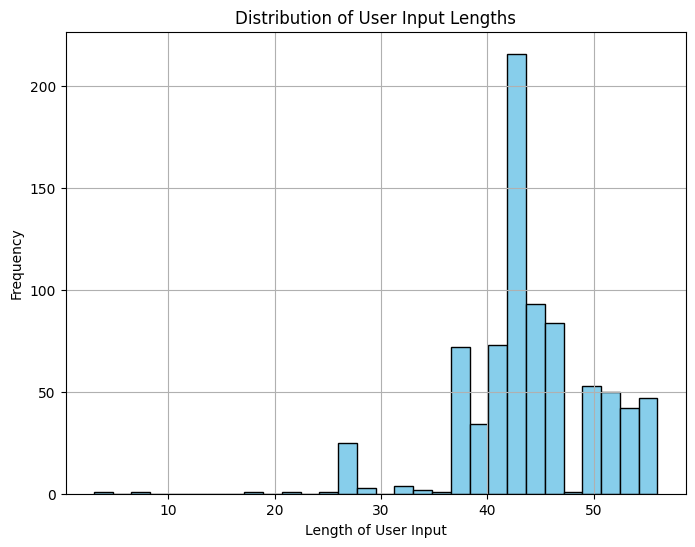

In [74]:
import matplotlib.pyplot as plt

#data exploration and visualization


# Plotting the distribution of user_input lengths
df['user_input_length'] = df['user_input'].apply(lambda x: len(x))
plt.figure(figsize=(8, 6))
plt.hist(df['user_input_length'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of User Input Lengths')
plt.xlabel('Length of User Input')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [75]:
 #Importing Necessary Libraries for GUI

import tkinter as tk
from tkinter import ttk, scrolledtext, messagebox
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import sqlite3

In [76]:
#Define Functions for Chatbot

# Preprocessing function
def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [word for word in tokens if word not in string.punctuation]
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text


# Function to find most similar response
def get_most_similar_response(user_input):
    user_input_processed = preprocess_text(user_input)
    user_vector = vectorizer.transform([user_input_processed])
    similarities = cosine_similarity(user_vector, corpus_vectors)
    most_similar_index = similarities.argsort(axis=1).flatten()[-1]
    return df['chatbot_response'].iloc[most_similar_index]

In [77]:
 #Define the ChatbotApp Class

class ChatbotApp:
    def __init__(self, root):
        self.root = root
        self.root.title("Mental Health Support Chatbot")
        self.root.geometry("800x600")
        self.root.configure(bg="#FFC0CB")

        self.chat_history = []
        self.login_frame = tk.Frame(root)
        self.login_frame.pack(pady=50)
        self.login_frame.configure(bg="#ffffff")

        self.username_label = ttk.Label(self.login_frame, text="Username:")
        self.username_label.grid(row=0, column=0, padx=10, pady=5)
        self.username_entry = ttk.Entry(self.login_frame, width=30)
        self.username_entry.grid(row=0, column=1, padx=10, pady=5)

        self.password_label = ttk.Label(self.login_frame, text="Password:")
        self.password_label.grid(row=1, column=0, padx=10, pady=5)
        self.password_entry = ttk.Entry(self.login_frame, show="*", width=30)
        self.password_entry.grid(row=1, column=1, padx=10, pady=5)

        self.login_button = ttk.Button(self.login_frame, text="Login", command=self.login)
        self.login_button.grid(row=2, column=0, columnspan=2, padx=10, pady=10)

        self.register_button = ttk.Button(self.login_frame, text="Sign Up", command=self.register)
        self.register_button.grid(row=3, column=0, columnspan=2, padx=10, pady=10)

        self.chat_history_display = scrolledtext.ScrolledText(root, width=70, height=20, font=('Times New Roman', 14))
        self.chat_history_display.pack(padx=10, pady=10)

        self.user_input_entry = ttk.Entry(root, width=70, font=('Times New Roman', 14))
        self.user_input_entry.pack(padx=10, pady=5)

        self.send_button = ttk.Button(root, text="Send", command=self.send_message)
        self.send_button.pack(padx=10, pady=5)

        self.chat_history_display.pack_forget()
        self.user_input_entry.pack_forget()
        self.send_button.pack_forget()

        self.initialize_chatbot()

    def initialize_chatbot(self):
        pass

    def login(self):
        username = self.username_entry.get()
        password = self.password_entry.get()
        if self.authenticate_user(username, password):
            messagebox.showinfo("Login Successful", "Welcome, " + username + "!")
            self.login_frame.pack_forget()
            self.chat_history_display.pack(padx=10, pady=10)
            self.user_input_entry.pack(padx=10, pady=5)
            self.send_button.pack(padx=10, pady=5)
            self.append_to_chat_history("Chatbot: Hi there! How can I help you today?", is_bot=True)
        else:
            messagebox.showerror("Login Failed", "Invalid username or password. Please try again.")

    def register(self):
        username = self.username_entry.get()
        password = self.password_entry.get()
        if self.check_existing_user(username):
            messagebox.showerror("Registration Failed", "Username already exists. Please choose a different username.")
            return
        self.add_user_to_database(username, password)
        messagebox.showinfo("Registration Successful", "User registered successfully! You can now login.")

    def authenticate_user(self, username, password):
        conn = sqlite3.connect("users.db")
        cursor = conn.cursor()
        cursor.execute("SELECT * FROM users WHERE username=? AND password=?", (username, password))
        user = cursor.fetchone()
        conn.close()
        return user is not None

    def check_existing_user(self, username):
        conn = sqlite3.connect("users.db")
        cursor = conn.cursor()
        cursor.execute("SELECT * FROM users WHERE username=?", (username,))
        user = cursor.fetchone()
        conn.close()
        return user is not None

    def add_user_to_database(self, username, password):
        conn = sqlite3.connect("users.db")
        cursor = conn.cursor()
        cursor.execute("INSERT INTO users (username, password) VALUES (?, ?)", (username, password))
        conn.commit()
        conn.close()

    def send_message(self):
        user_input = self.user_input_entry.get()
        self.user_input_entry.delete(0, tk.END)
        self.append_to_chat_history("You: " + user_input, is_bot=False)
        chatbot_response = get_most_similar_response(user_input)
        self.append_to_chat_history("Chatbot: " + chatbot_response, is_bot=True)

    def append_to_chat_history(self, message, is_bot=False):
        self.chat_history.append((message, is_bot))
        self.display_messages()

    def display_messages(self):
        self.chat_history_display.configure(state='normal')
        self.chat_history_display.delete(1.0, tk.END)
        for message, is_bot in self.chat_history:
            if is_bot:
                self.chat_history_display.insert(tk.END, message + "\n", 'bot')
            else:
                self.chat_history_display.insert(tk.END, message + "\n", 'user')
        self.chat_history_display.configure(state='disabled')

In [79]:
#Create Tkinter Root Window and ChatbotApp Instance

root = tk.Tk()
app = ChatbotApp(root)

# Styling for messages
app.chat_history_display.tag_configure('bot', foreground='black', justify='left', font=('Times New Roman', 14))
app.chat_history_display.tag_configure('user', foreground='black', justify='right', font=('Times New Roman', 14))

# Run the Tkinter event loop
root.mainloop()